### Predicting heart disease using machine learning
1. Problem Definition
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

3. Evaluation
        1. Problem Definition
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

3. Evaluation
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.
4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
13. thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### preparing the tools 


In [1]:
# Importing all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

### Load data
There are many different kinds of ways to store data. The typical way of storing tabular data, data similar to what you'd see in an Excel file is in .csv format. .csv stands for comma seperated values.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

In [2]:
df = pd.read_csv("heart.csv")
df.shape


(303, 14)

### Data exploration 


Data Exploration (exploratory data analysis or EDA)
Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the head() function. Calling it on any dataframe will print the top 5 rows, tail() calls the bottom 5. You can also pass a number to them like head(10) to show the top 10 rows.

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

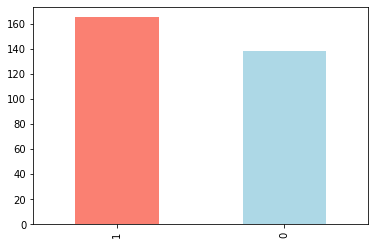

In [15]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [19]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


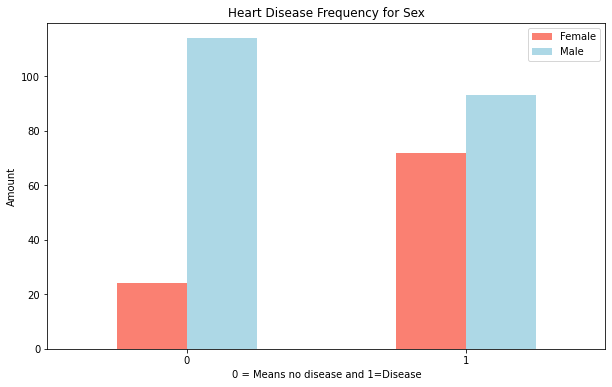

In [24]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),
                                 color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = Means no disease and 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [28]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

### Age vs Max Heart Rate for Heart Disease

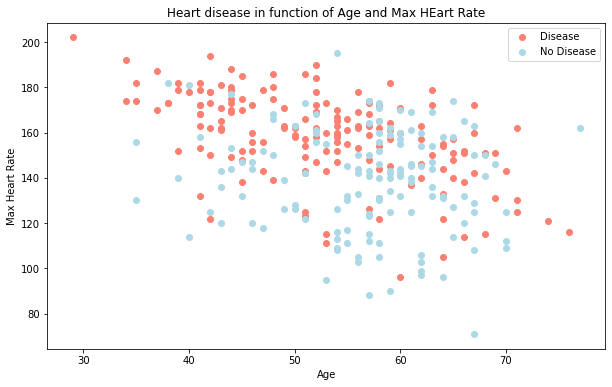

In [44]:
# create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1], 
           df.thalach[df.target==1],
           color="salmon"
           );
#scatter with negative examples
plt.scatter(df.age[df.target==0], 
           df.thalach[df.target==0],
           color="lightblue"
           );
# Add helpfull info
plt.title("Heart disease in function of Age and Max HEart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);


In [39]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

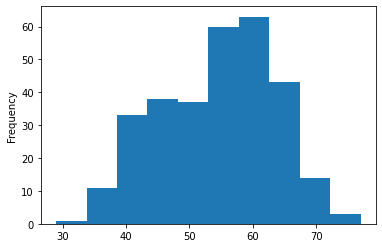

In [46]:
df.age.plot.hist();

### Age vs Max Heart rate for Heart Disease
Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.



In [49]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


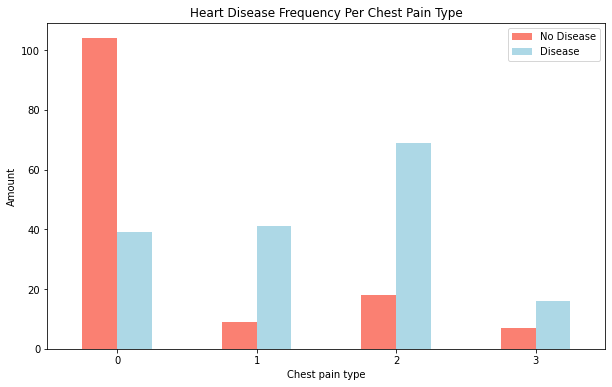

In [54]:
# Make the  crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),
                                 color=(["salmon","lightblue"])
                                 );
plt.title("Heart Disease Frequency Per Chest Pain Type");
plt.xlabel("Chest pain type");
plt.ylabel("Amount");
plt.legend(["No Disease","Disease"]);
plt.xticks(rotation=0);

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


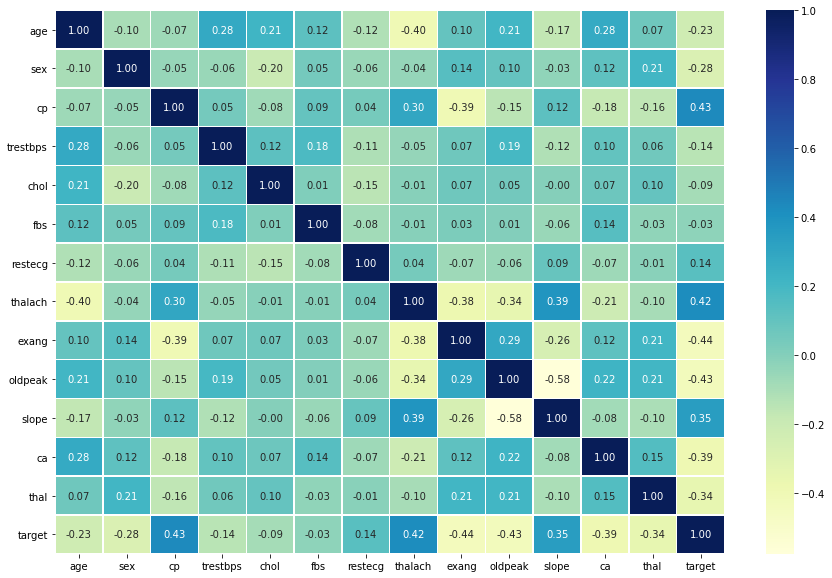

In [3]:
# let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))

ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu"
                   );

### Modelling

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# split data into  x and y
x=df.drop("target",axis=1)
y=df["target"]


In [69]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
#split the data into train and test sets
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [71]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [72]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### Model choices¶
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

In [10]:
models ={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}
#create a func to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    #set random seed
    np.random.seed(42)
    #make a dict to keep model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
            #fit the model to the data
            model.fit(x_train,y_train)
            #Evaluate the model and append its score to model_score
            model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [11]:
model_scores =fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test 
                           )
model_scores

C:\Users\Tharun S\DESKTOP\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

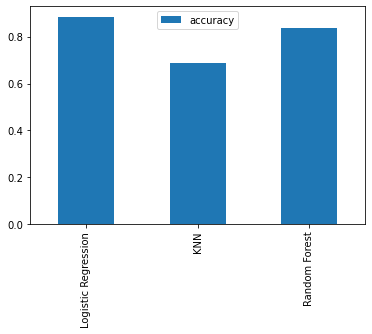

In [89]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

### 
1. Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
2. Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
3. Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
4. Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
5. Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
6. Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
7. F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
8. Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
9. ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
10. Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter tuning

In [12]:
# Let's tune KNN
train_scores= []
test_scores=[]

neighbors = range(1,21)

KNN = KNeighborsClassifier()

for i in neighbors:
    KNN.set_params(n_neighbors=i)
    KNN.fit(x_train,y_train)
    train_scores.append(KNN.score(x_train,y_train))
    test_scores.append(KNN.score(x_test,y_test))

In [94]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [96]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


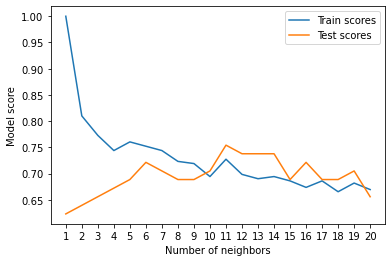

In [13]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV 
1. logicstic regression 
2. RandomForest classifier
3. ... using RandomizedSearchCV

In [25]:
# create a hyperparameter grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
#Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}


In [18]:
np.arange(10,1000,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

### Now we've got hyperparameter grids setup for each of our models,let's tune them using RandomizedSearchCV

In [21]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                                n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

###  Now we've tuned logisticRegression let's do the same for RandomForestClasssifier

In [26]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [28]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [29]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### 
1. By hand
2. RandomizedSearchCV
3. GridSearchCV


## Hyperparameter Tuning with GridSearchCV

In [31]:
# Different hyperparameters for our logisticsRegression model
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier,beyond accuracy 
* ROC curve and AUC score
* Confusion matrix 
* Classification report 
* Precision
* Recall 
* F1-score


In [36]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)


In [37]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

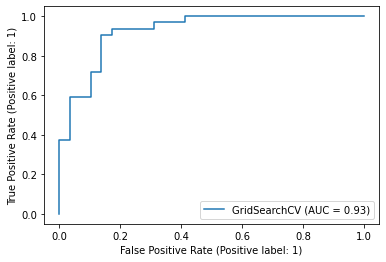

In [39]:
# plot roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test)

In [40]:
# Confusion matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


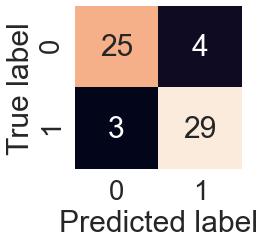

In [43]:
sns.set(font_scale=2.5)
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                                   annot=True,
                                   cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

In [45]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation


In [46]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                        solver="liblinear")

In [62]:
#cross-validated accuracy 
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc= np.mean(cv_acc)
cv_acc

0.8446994535519124

In [57]:
#cross-val precision
cv_prec = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_prec= np.mean(cv_prec)
cv_prec

0.8207936507936507

In [58]:
#cross-val f1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

In [60]:
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9212121212121213

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

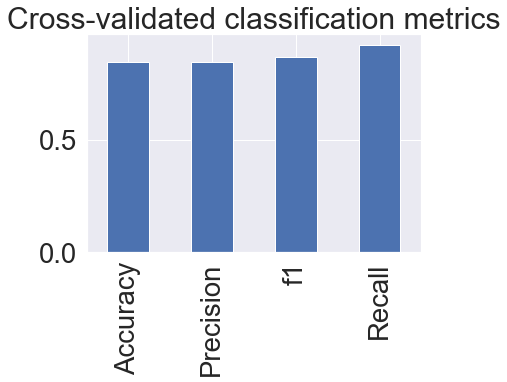

In [66]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "f1":cv_f1,
                         "Recall":cv_recall},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

### Feature importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the coef_ attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

We can access the coef_ attribute after we've fit an instance of LogisticRegression.

In [67]:
#fit an instance of logisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(x_train,y_train);

In [72]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [74]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<AxesSubplot:title={'center':'Featue Importance'}>

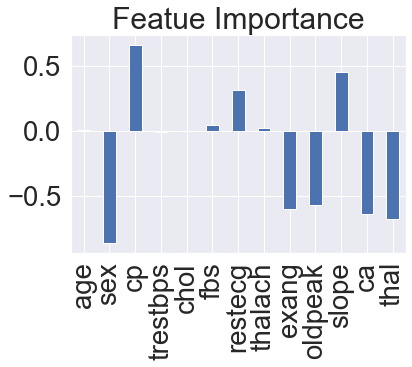

In [75]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Featue Importance",legend=False)

In [76]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [77]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### 6. Experimentation
Well we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.
